In [1]:
pip install tensorflow

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout



In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
X_train = X_train/255
X_test = X_test/255

In [8]:
print(X_train)
print(X_test)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [9]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [5]:
model = Sequential()

# First layer with input_shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # input_shape specified here
model.add(MaxPool2D(2, 2))

# Flatten to connect to Dense layers
model.add(Flatten())

# Hidden layer
model.add(Dense(100, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9086 - loss: 0.3042
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9824 - loss: 0.0584
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9893 - loss: 0.0352
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9930 - loss: 0.0219
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9956 - loss: 0.0138
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9973 - loss: 0.0093
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9973 - loss: 0.0080
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9984 - loss: 0.0047
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9990 - loss: 0.0031
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9985 - loss: 0.0043


In [16]:
model.evaluate(X_train,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9986 - loss: 0.0042


[0.003749119583517313, 0.9987499713897705]

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt


In [18]:
# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Fit the data generator to your training data
datagen.fit(X_train)

# Use the data generator to flow augmented data during training
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10)

Epoch 1/10
   4/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.5176 - loss: 5.5526   

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8242 - loss: 0.6465
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9307 - loss: 0.2302
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9448 - loss: 0.1744
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9528 - loss: 0.1519
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9546 - loss: 0.1446
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9571 - loss: 0.1367
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9615 - loss: 0.1217
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9615 - loss: 0.1213
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9630 - loss: 0.1188
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9650 - loss: 0.1094


In [19]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0766
Test Accuracy: 0.9769


In [20]:

from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

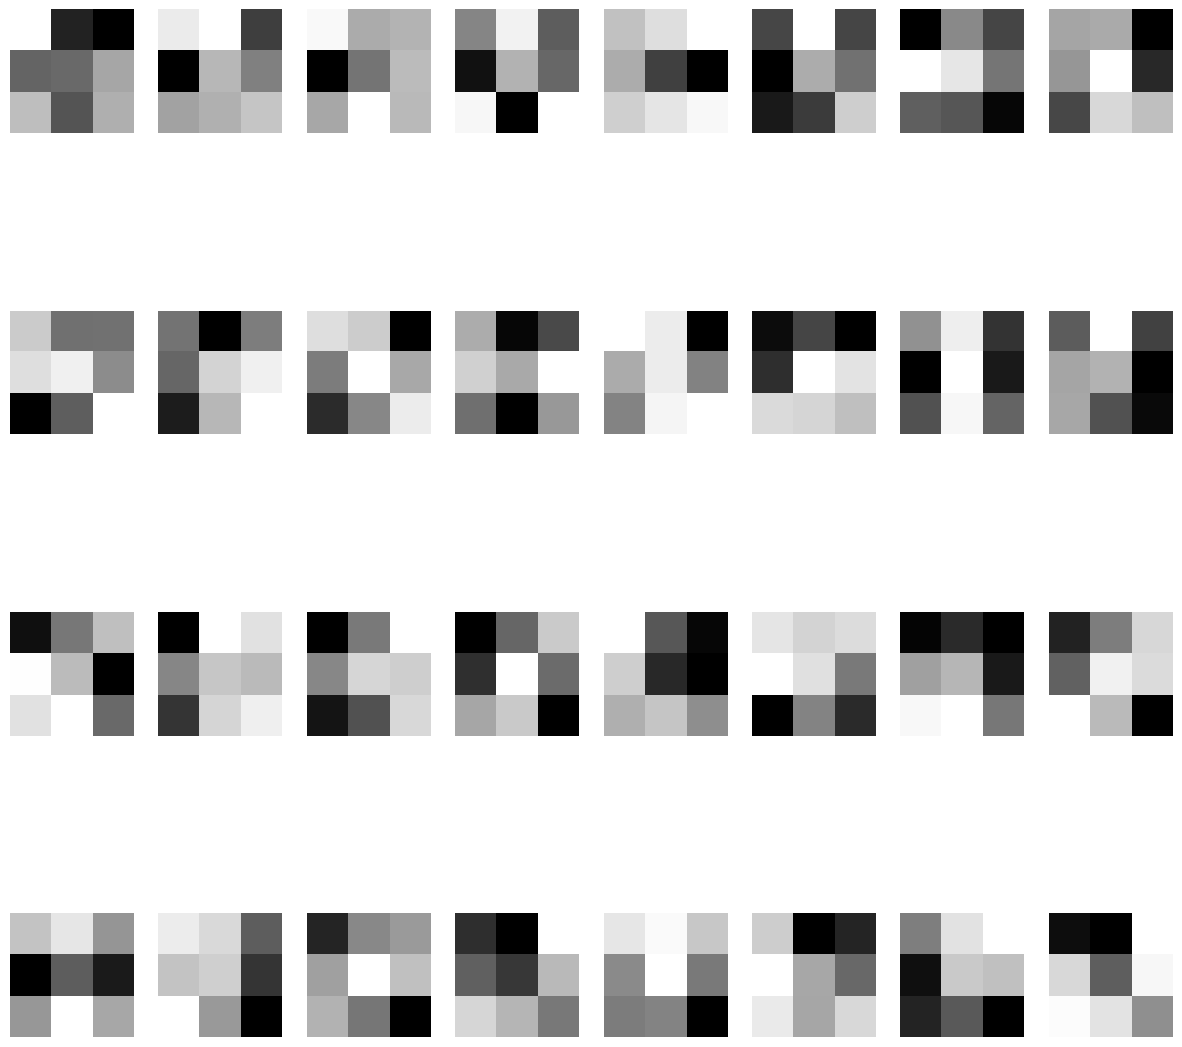

In [21]:
# Get the output of the first convolutional layer
layer_output = Model(inputs=model.inputs, outputs=model.layers[0].output)

    # Get the filters
filters, biases = model.layers[0].get_weights()

    # Plot the filters
f, axarr = plt.subplots(4, 8, figsize=(15, 15))
for i in range(4):

  for j in range(8):

   axarr[i, j].imshow(filters[:, :, 0, i * 8 + j], cmap='gray')
   axarr[i, j].axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.13      0.89      0.23       980
           1       0.24      0.01      0.01      1135
           2       0.19      0.08      0.11      1032
           3       0.03      0.08      0.04      1010
           4       0.00      0.00      0.00       982
           5       0.22      0.02      0.04       892
           6       0.59      0.02      0.04       958
           7       0.02      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.09      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.15      0.11      0.05     10000
weighted avg       0.15      0.11      0.05     10000



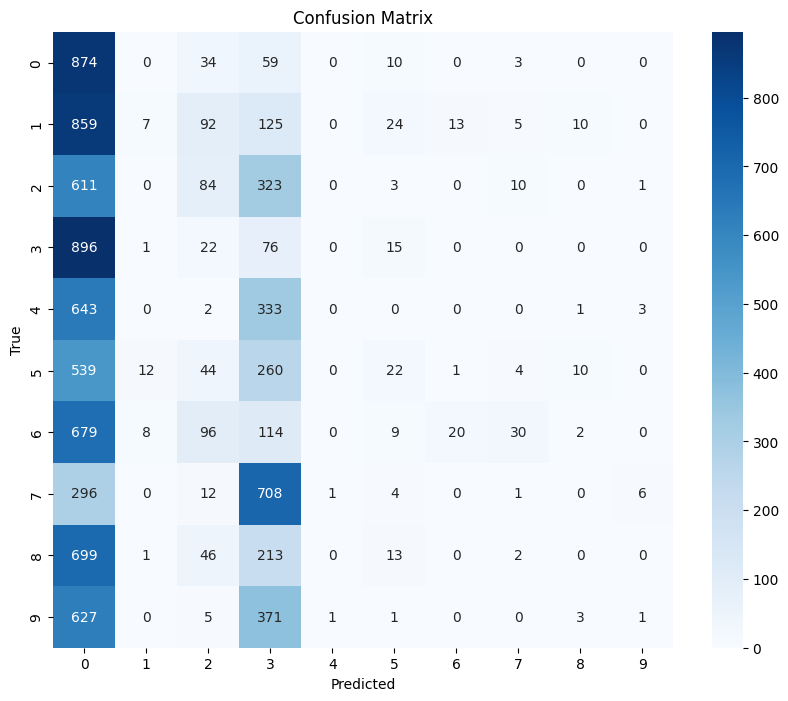

In [12]:
# prompt: what next i can do in this project

# Predict on the test data
predictions = model.predict(X_test)

# Get predicted labels
predicted_labels = predictions.argmax(axis=1)

# Analyze the results
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_test, predicted_labels))

#Confusion Matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


#Further improvements:

#1. Hyperparameter tuning: Experiment with different optimizers, learning rates, batch sizes, and number of epochs to improve the model's accuracy and performance.

#2. Model architecture: Try different convolutional layers, dense layers, dropout layers, and maxpooling layers. Experiment with different activation functions, kernel sizes, and strides in the Conv2D layers.

#3. Data augmentation: Explore more advanced image augmentations.  Try using techniques like random erasing, cutout, mixup, or CutMix to further diversify the training data.

#4. Regularization techniques: Add more dropout layers, L1 or L2 regularization, or use early stopping to prevent overfitting.

#5. Different model architectures:  Consider exploring other CNN architectures like ResNet, VGG, or Inception, which have proven successful in image classification tasks. Transfer learning could be helpful here, using pre-trained models on larger datasets as a starting point.

#6. Learning rate schedulers: Using a learning rate scheduler that dynamically adjusts the learning rate during training can sometimes lead to better results.

#7.  More advanced visualization:  Visualize intermediate activations of different layers to understand how the network is processing information. Use Grad-CAM or similar techniques to visualize which parts of the image are most important to the network's decision.


#Example of Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#param_grid = {
#    'optimizer': ['adam', 'rmsprop'],
#    'epochs': [10,20],
#    'batch_size':[32, 64],
#    # Add other hyperparameters to tune...
#}
#grid = GridSearchCV(estimator=model, param_grid=param_grid) #or RandomizedSearchCV
#grid_result = grid.fit(X_train, y_train)
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))